**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: ERIK JOSUÉ MORENO MEJÍA

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [3]:
happiness = pd.read_csv('/content/happiness_report.csv')
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [4]:
mexico = happiness.loc[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

In [5]:
sns.set_palette('Set2')

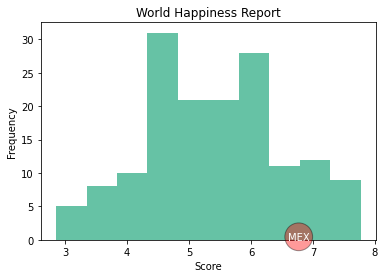

In [7]:
happiness['Score'].plot.hist()
mex_value_score = happiness.loc[happiness['Country or region'] == 'Mexico', 'Score'].to_list()[0]
props_bbox = {'boxstyle': 'circle', 'facecolor': 'red', 'alpha': 0.4}
plt.annotate('MEX', xy=(mex_value_score, 0), bbox = props_bbox, color='white')
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

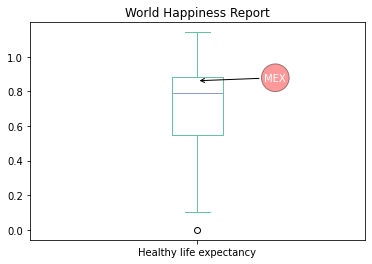

In [9]:
happiness['Healthy life expectancy'].plot.box()
mex_value_health = happiness.loc[happiness['Country or region'] == 'Mexico', 'Healthy life expectancy'].to_list()[0]
plt.annotate('MEX', xy=(1, mex_value_health), xytext=(1.2, mex_value_health), arrowprops=dict(arrowstyle='->'), bbox=props_bbox, color='white')
plt.title('World Happiness Report')
plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [10]:
mexico_factors = mexico.T
mexico_factors.drop(['Overall rank', 'Score'], axis=0, inplace=True)
mexico_factors.rename(columns={'Mexico': 'Factors'}, inplace=True)
mexico_factors

Country or region,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


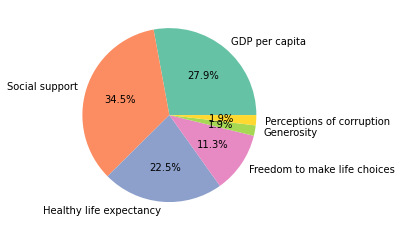

In [12]:
mexico_factors['Factors'].plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [14]:
happiness.loc[happiness['Score'] == happiness.loc[:, 'Score'].max()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [16]:
happiness.loc[happiness['Score'] == happiness.loc[:, 'Score'].min()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.01,0.202,0.091


In [17]:
some_countries = happiness.loc[happiness['Country or region'].isin(['Mexico', 'Germany', 'Spain', 'Finland', 'South Sudan'])]
some_countries.drop(['Overall rank', 'Score'], axis=1, inplace=True)
some_countries.set_index('Country or region', inplace=True)
some_countries = some_countries.T
some_countries

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Country or region,Finland,Germany,Mexico,Spain,South Sudan
GDP per capita,1.340,1.373,1.070,1.286,0.306
Social support,1.587,1.454,1.323,1.484,0.575
Healthy life expectancy,0.986,0.987,0.861,1.062,0.295
Freedom to make life choices,0.596,0.495,0.433,0.362,0.010
Generosity,0.153,0.261,0.074,0.153,0.202
Perceptions of corruption,0.393,0.265,0.073,0.079,0.091


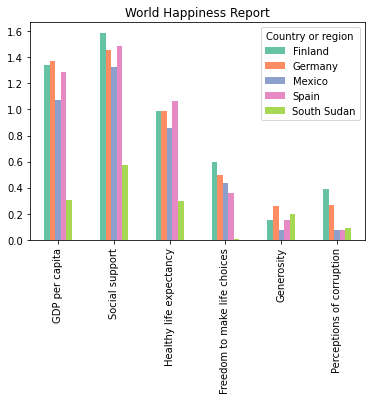

In [18]:
some_countries.plot.bar()
plt.title('World Happiness Report')
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

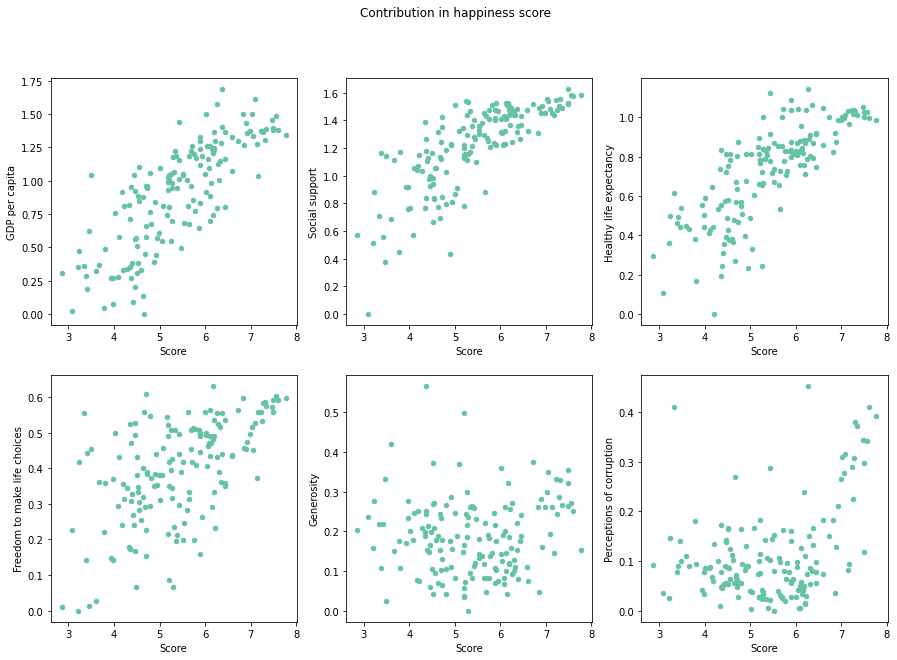

In [19]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
happiness.plot.scatter(x='Score', y='GDP per capita', ax = axs[0,0])
happiness.plot.scatter(x='Score', y='Social support', ax = axs[0,1])
happiness.plot.scatter(x='Score', y='Healthy life expectancy', ax = axs[0,2])
happiness.plot.scatter(x='Score', y='Freedom to make life choices', ax = axs[1,0])
happiness.plot.scatter(x='Score', y='Generosity', ax = axs[1,1])
happiness.plot.scatter(x='Score', y='Perceptions of corruption', ax = axs[1,2])
fig.suptitle('Contribution in happiness score')
plt.show()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

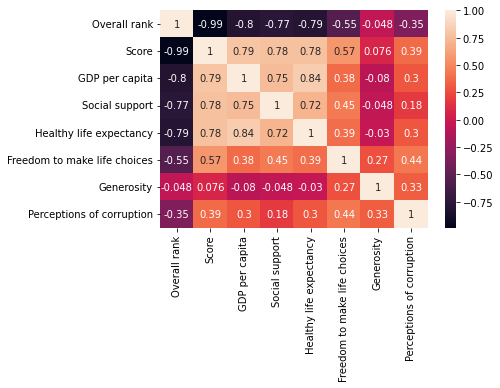

In [21]:
sns.heatmap(happiness.corr(), annot=True)
plt.show()

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

In [23]:
metadata = pd.read_csv('/content/Metadata.csv')
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [24]:
happiness_region = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')
happiness_region.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands


In [25]:
happiness_region = happiness_region.groupby('Region').mean()[['Score']]

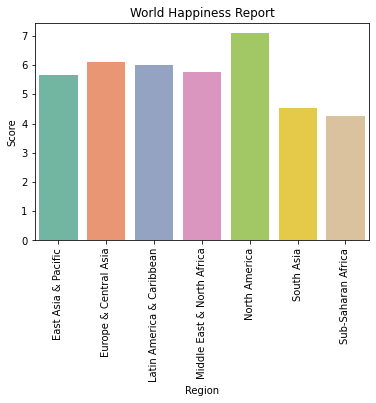

In [26]:
sns.barplot(x=happiness_region.index, y='Score', data=happiness_region)
plt.xticks(rotation=90)
plt.title('World Happiness Report')
plt.show()